# Courbes de niveau
*Jean Pierre Louis COMMUNAL et Viviane Lesbre*


On importe les modules nécessaires à l'exercice :

In [223]:
import autograd
import autograd.numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 
from IPython.display import display

On ajoute les fonctions exemple qui nous serviront pour tester nos programmes :

In [4]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f


In [5]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

Pour le tracé des courbes on définit aussi:


In [6]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

**Question 1:**


Soit c $\in \mathbb{R}$, 
on appelle C={$(x_1,x_2) \in \mathbb{R}, f(x_1,x_2)=c$}.

 Soit $A \in \mathbb{R}$, comme $\underset{||(x_1,x_2)||\to+\infty}{lim f(x_1,x_2)}=+\infty$, on a 
$$\exists (x_{10},x_{20}) \in \mathbb{R}^2, ||x_1,x_2||\geq ||x_{10},x_{20}|| \Rightarrow f(x_1,x_2) \geq A $$
$$\omega=  \{ (x_1,x_2) \in \mathbb{R}^2, ||(x_1,x_2)||\leq||x_{10},x_{20}||\}$$ 
f continue sur $\omega$ qui est donc un fermé. La fonction f est donc continue sur un fermé, elle y est donc bornée et atteint ses bornes, 
$$ B = \underset{(x_1,x_2) \in \omega }{min (f(x_1,x_2))}$$
Hors de ce domaine on a par définition
$$ \forall (x_1,x_2) \notin \omega, \ |f(x_1,x_2)| > A$$
Donc en posant $a=min(A,B)$ on a $\forall (x_1,x_2) \in \mathbb{R}^2, |f(x_1,x_2)| \geq a$ 

On a donc trouvé un minimum pour la fonction f.
On fait alors une dissociation de cas en fonction de la valeur de c:

* $c < a$ : il n'y a aucune solution possible
* $c \geq a$ : il y a au moins une solution, dans ce cas de plus comme f est continue que  C est un ensemble fermé.


De même on définit les fonctions gradient, calcul de la jacobienne :

**Question 2 :** 

On remarque que en projettant 
$ X_0 =\begin{pmatrix}
    x_1 - x_{10} \\
    x_2 - x_{20} \\
  \end{pmatrix}$
  sur un vecteur orthogonal au gradient de f en $X_0$ de norme 1

$$ \frac{1}{||\nabla f(x_0)||}    
 \begin{pmatrix}
  \partial _2f(x_1,x_2) \\
  -\partial _1f(x_1,x_2) \\
 \end{pmatrix} 
$$
Avec l'hypothèse que $||\nabla f(x_0)|| \ne$ 0, on obtient $p(x_1,x_2)$.  
 
 Donc $p(x_1,x_2)$ correspond à la distance de $X_0$ à la droite portée par le gradient.



 **Question 3:**

On cherche à appliquer le théorème des fonctions implicites. 
On pose comme fonction 
$$
F(x,t)= \begin{pmatrix}
  f(x)-c \\
  p(x)-t \\
 \end{pmatrix} 
 $$
On a alors
$$ 
J_F(x)= \begin{pmatrix}
  \partial _{1}f(x) & \partial _{2}f(x) \\
  \partial _{1}p(x) & \partial _{2}p(x) \\
 \end{pmatrix} 
 = \begin{pmatrix}
  \partial _{1}f(x) & \partial _{2}f(x) \\
  \frac{\partial _{2}f(x_0)}{||\nabla f(x_0)||} & -\frac{\partial _{1}f(x_0)}{||\nabla f(x_0)||} \\
 \end{pmatrix} 
 $$


$$ 
|J_F(x)| = -\frac{\partial_1f(x)*\partial_1f(x_0) +\partial_2f(x)*\partial_2f(x_0)}{||\nabla f(x_0)||}
$$

On se place dans un voisinage U ouvert de $x_0$ et $t_0$ tel que $|J_F(x)| \neq 0$  
Un tel voisinage existe car on sait que $|J_F(x_0)| \neq 0$ et F continue.

On a comme hypothèses :
* f et p continûment différentielles, donc F continûment différentielle
*  $J_F(x_0)$ a un déterminant non nul sur U donc elle ets inversible
* $\exists (x_0, t_0) \in \mathbb{R}^2, F(x_0,t_0) = 0$

Donc en appliquant le théorème des fonctions implicites on a
l'existence de voisinages ouverts $U_0$ et $V_0 = ]-\epsilon:+\epsilon[$ de $x_0$ et $t_0$ appartenant à U et une unique fontion 
$\gamma : V_0 \rightarrow \mathbb{R}^2$ continûment différentiable telle que 
$\forall t\in V_0 \forall x=(x_1,x_2) \in U_0,\ f(x,t)=0 \ \iff \ (x_1,x_2)=\gamma (t)$

 avec  $p(x_1,x_2)=t$



**Question 4:**

Soit t $\in ]-\epsilon:+\epsilon[$ , toujours d'après le théorème des fonctions intégrables appliqué en Q3 on a la différentiel de $\gamma$ :
$$ 
d\gamma(t) = -(\partial_xF(x,t))^{-1}. \partial_t F(x,t) \\
= \frac{1}{det(J_F(x))} * \begin{pmatrix}
  -\frac{\partial _{1}f(x_0)}{||\nabla f(x_0)||} & -\partial _{2}f(x) \\
  -\frac{\partial _{2}f(x_0)}{||\nabla f(x_0)||} & \partial _{1}f(x) \\
 \end{pmatrix} 
 * \begin{pmatrix}
  0 \\
  -1 \\
 \end{pmatrix}
 \\
 =\frac{1}{det((J_F(x))} * \begin{pmatrix}
  \partial _{2}f(x) \\
  -\partial _{1}f(x) \\
 \end{pmatrix} 
 \\
 \neq  \begin{pmatrix}
  0 \\
  0 \\
 \end{pmatrix}
$$
Donc $\gamma$'(t) $\neq$ 0, il fournit donc une tangente au chemin $\gamma$.
De plus 
$$  
\nabla f(\gamma(t))= \nabla f(x) = \begin{pmatrix}
  \partial _{1}f(x) \\
  \partial _{2}f(x) \\
 \end{pmatrix} 
$$
qui est non nul par hypothèse au voisinage de $x_0$.
On a bien que 
$$ 
\begin{pmatrix}
  \partial _{2}f(x) \\
  -\partial _{1}f(x) \\
 \end{pmatrix} 
 *
 \begin{pmatrix}
  \partial _{1}f(x) \\
  \partial _{2}f(x) \\
 \end{pmatrix} 
 = \begin{pmatrix}
0 \\
  0\\
 \end{pmatrix} 
 $$
 Soit $\gamma'(t)$ est bien orthogonal à $\nabla f(\gamma(t))$.

**Question 5:**

On cherche à avoir une certaine précision pour trouver l'intersection cependant il ne faut pas déscendre en dessous de l'$\epsilon$ machine $\epsilon \approx 2,2*10^{-16}$. On choisit donc  eps = $10^{-7}$ 


**Tache 1:**

On implémente la fonction de Newton :

In [7]:
def Newton(F, x0, y0, eps, N):
    J_F = J(F)
    for i in range(N):
        X0 = np.array([x0, y0])
        J_F_inv = np.linalg.inv(J_F(X0[0], X0[1])) # calcul de l'inverse de la jacobienne en x0, y0
        X = X0 - np.dot(J_F_inv,F(X0[0], X0[1])) # calcul du nouveau point X =(x, y)
        x, y = X[0], X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return (x, y)
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")


**Tâche 2:**

On teste avec $f_1$ :

In [8]:
def F1(x,y):
    return np.array([f1(x,y)-0.8, x-y])


#On fait varier epsilon 
plt.figure()

display_contour(
    f1, 
    x = np.linspace(-1.0, 1.0, 100), 
    y = np.linspace(-1.0, 1.0, 100), 
    levels = 10 # 10 levels, automatically selected
)
eps = np.linspace(0.0000001,1,10)
for i in range(10):
    X_sol = Newton(F1, 0.8, 0.8, eps[i], 100)
    x1, x2 = X_sol[0], X_sol[1]
    plt.plot(x1,x2,'bo')
plt.title("Variation de epsilon")
plt.show()

#on fait varier la contrainte supplémentaire x = 1/2*y
def F2(x,y):
    return np.array([f1(x,y)-0.8, x-2*y])

plt.figure()

display_contour(
    f1, 
    x = np.linspace(-1.0, 1.0, 100), 
    y = np.linspace(-1.0, 1.0, 100), 
    levels = 10 # 10 levels, automatically selected
)
X_sol1 = Newton(F2, 0.8, 0.8, 0.001, 100)
x11, x21 = X_sol1[0], X_sol1[1]
x = np.linspace(-1.0, 1.0, 100)
y = 1/2*x
plt.plot(x,y,'b')
plt.plot(x11,x21,'go')
plt.title("Variation de la contrainte")

NameError: name 'autograd' is not defined

**Question 6:**

On part d'un point $(x_0,y_0)$ tel que $f(x_0,y_0)=c$ et on cherche l'intersection entre le cercle de rayon $\delta >0$ et la courbe de niveau $f(x,y)=c$.
On a donc comme équations 
$$
\left\{ \begin{array}{ll}
        (x_1-x_0)^2 + (y_1-y_0)^2= \delta^2 \\
        f(x_1,y_1)=c \\
    \end{array}
    \right.
  $$
  On prend donc comme fonction
  $$
  F\begin{pmatrix}  x_1 \\    y_1 \\ \end{pmatrix} = 
 \begin{pmatrix}  (x_1-x_0)^2 + (y_1-y_0)^2- \delta^2  \\
  f(x_1,y_1)-c \\
 \end{pmatrix}
 $$
 et on cherche $F\begin{pmatrix}  x_1 \\    y_1 \\ \end{pmatrix} = \begin{pmatrix}  0 \\   0 \\ \end{pmatrix}$ On peut donc appliquer la méthode de Newton coder au dessus.Pour s'assurer  que le point afficher soit bien "à droite" quand on est en $(x_0,y_0)$ et qu'on regarde  dans la direction de $\nabla f(x_0,y_0)$ on initialise la recherche de zero par la méthode de Newton en choisisant comme point de référence $(x_{0init},y_{0init})$ en effectuant une rotation de $-\frac{\pi}{2}$ à partir du gradient.
 C'est à dire :
 $$
 \underbrace{\begin{pmatrix}  x_{0init} \\    y_{0init} \\ \end{pmatrix}}_{point \ d'initialisation \ de \ Newton}
 =  \underbrace{\begin{pmatrix}  0 & -1 \\    1 & 0 \\ \end{pmatrix} }_{matrice \ de \ rotation}
 * \underbrace{(\begin{pmatrix}  x_0 \\    y_0 \\ \end{pmatrix} + \frac{\nabla f(x_0,y_0)}{||\nabla f||}*\delta)}_{appartenance \ au \ cerlce \  de \ rayon \ \delta}
 $$
 On implemente alors la fonction $level \_{} curve$ qui répète ce procédé :

**Tâche 3:**

In [13]:
def level_curve(f, x0, y0, delta=0.1, N=1000, eps=10):
    X = np.empty(shape = (2, N))
    X[0][0] = x0
    X[1][0] = y0
    c = f(x0, y0)
    def g(x1, y1):          # on veut une fonction de R^2 dans R^2
        return np.array([f(x1, y1) - c, (x1 - x0)**2 + (y1 - y0)**2 - delta**2])
    for i in range(N-1):
        gradF = grad(f)(x0, y0)
        grad_rot = np.array([gradF[1], -gradF[0]]) # rotation de 90° vers la droite du gradient
        point_int = grad_rot * delta/np.linalg.norm(grad_rot) 
        point_depart = np.array([point_int[0]+x0, point_int[1]+y0])  # point de départ pour Newton
        tab = Newton(g, point_depart[0], point_depart[1], eps, N)
        x0, y0 = tab[0], tab[1]
        X[0][i+1] = x0
        X[1][i+1] = y0
    return X

In [20]:
eps = 10**(-7)
N = 100
X0 = Newton(F1, 0.8, 0.8,eps, N)
X1 = np.array([0.51792427, 0.37650292])
x0, y0 = X0[0], X0[1]
x1, y1 = X1[0], X1[1]

Tab_sol = level_curve(f1, x0, y0, delta=0.01, N=500, eps=0.001)
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(Tab_sol[0][0], Tab_sol[1][0], 'bo')
for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')


NameError: name 'autograd' is not defined

On reconnaît bien la ligne de niveau de $f_1$

On teste avec la fonction $f_2$ :

In [ ]:
eps = 10**(-7)
N = 100
X0 = Newton(F2, 0.8, 0.8,eps, N)
X1 = np.array([0.51792427, 0.37650292])
x0, y0 = X0[0], X0[1]
x1, y1 = X1[0], X1[1]

Tab_sol = level_curve(f2, x0, y0, delta=0.01, N=500, eps=0.001)

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.plot(Tab_sol[0][0], Tab_sol[1][0], 'bo')

for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')

De même on reconnaît la courbe de niveau de $f_2$.

**Question 7 et Tâche 4:**

On cherche d'abord à écrire une fonction qui teste si deux segments on une intersection : 
Pour cela, on paramètre nos deux segments $u_{AB} \in [0;1]$ et  $u_{CD} \in [0;1]$. On veut $A+u_{AB}*(B-A)= C+u_{CD}*(D-C)$


Comme on est dans un plan on obtient deux équations:
$$
\left\{ \begin{array}{ll}
        x_{AB} = x_A + u_{AB}*(x_B-x_A) \\
        y_{AB} = y_A + u_{AB}*(y_B-y_A) \\
    \end{array}
    \right.
  $$
  Soit en résolvant ce système :
  $$
  \left\{ \begin{array}{ll}
        u_{AB} = \frac{(x_D-x_C)(y_C-y_A)+(x_A-x_C)(y_D-y_C)}{(x_D-x_C)(y_B-y_A)-(x_B-x_A)(y_D-y_c))} \\
        u_{CD} = \frac{(x_B-x_A)(y_C-y_A)-(x_C-x_A)(y_B-y_A)}{(x_D-x_C)(y_B-y_A)-(x_B-x_A)(y_D-y_c))} \\
    \end{array}
    \right.
$$
Si le dénominateur s'annule, les deux segments sont parrallèles, donc ne se croisent jamais.



In [ ]:
def intersection(S1,S2):
    x11, y11 = S1[0][0], S1[0][1]
    x12, y12 = S1[1][0], S1[1][1]
    x21, y21 = S2[0][0], S2[0][1]
    x22, y22 = S2[1][0], S2[1][1]
    if (x22-x21)*(y12-y11) == (x12-x11)*(y22-y21) :
        # segments colinéaires
        if max(min(x11,x12),min(x21,x22)) <= mint(max(x12,x11),max(x21,x22)) :
            #les segments se chevauchent
            return True
        else :
            return False
    else :
        uAB = ((x22-x21)*(y21-y11)-(x21-x11)*(y22-y21))/((x22-x21)*(y12-y11)-(x12-x11)*(y22-y21))
        uCD = ((x12-x11)*(y21-y11)-(x21-x11)*(y12-y11))/((x22-x21)*(y12-y11)-(x12-x11)*(y22-y21))
        if uAB > 0 and uAB < 1 and uCD > 0 and uCD < 1 :
            #il y a une intersection
            return True
        else :
            return False

On observe les courbes de niveau de la fonction Rosenbrock, on remarque que les courbes de niveaux se croisent, ces courbes auto-intersectantes sont assez rares car ...

On peut donc tester l'intersection du dernier segment avec juste le premier segment.
On écrit alors une nouvelle fonction $level\_curve$ :


In [ ]:
def level_curve2(f, x0, y0, delta=0.1, N=1000, eps=10):
    X = np.empty(shape = (2, N))
    X[0][0] = x0
    X[1][0] = y0
    P0 = [x0,y0]
    c = f(x0, y0)
    stop = False
    i = 0
    def g(x1, y1):          # on veut une fonction de R^2 dans R^2
        return np.array([f(x1, y1) - c, (x1 - x0)**2 + (y1 - y0)**2 - delta**2])
    while not(stop) and i <(N-1):
        gradF = grad(f)(x0, y0)
        grad_rot = np.array([gradF[1], -gradF[0]]) # rotation de 90° vers la droite du gradient
        point_int = grad_rot * delta/np.linalg.norm(grad_rot) 
        point_depart = np.array([point_int[0]+x0, point_int[1]+y0])  # point de départ pour Newton
        tab = Newton(g, point_depart[0], point_depart[1], eps, N)
        x0, y0 = tab[0], tab[1]
        X[0][i+1] = x0
        X[1][i+1] = y0
        if i == 0 :
            P1 = [x0,y0]
            S0 = [P0,P1]
            S = S0         # on enregistre le 1 er segment
        else :
            Pint = S[1]
            P = [x0,y0]
            S = [Pint,P] 
            if intersection(S0,S) :
                print('on a intersecté le 1er segment à i =',i)
                stop = True # on arrête le programme si il y a une intersection
        i +=1
    return X,stop

**Tâche 5:**

 On teste avec $f_1$ :


In [ ]:
eps = 10**(-7)
N = 500
X0 = Newton(F1, 0.8, 0.8,eps, N)
X1 = np.array([0.51792427, 0.37650292])
x0, y0 = X0[0], X0[1]
x1, y1 = X1[0], X1[1]

Tab_sol, arret = level_curve2(f1, x0, y0, delta=0.01, N=345, eps=10**(-7))

print('''On a arrêté l'algorithme:''' ,arret)    # True = on a intersecté le premier segment
plt.figure()
plt.title('En intersectant')
for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')
plt.show()

Tab_sol, arret = level_curve2(f1, x0, y0, delta=0.01, N=300, eps=10**(-7))

print('''On a arrêté l'algorithme:''' ,arret)    # True = on a intersecté le premier segment
plt.figure()
plt.title('Sans intersecter')
for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')
plt.show()

Comme on travail avec des arrays, une fois l'algorythme arrêté le reste du tableau X contient que des zéros, d'où le point en (0,0) qui s'affiche.

On test avec $f_2$:


In [ ]:
eps = 10**(-7)
N = 500
X0 = Newton(F2, 0.5, 0.5,eps, N)
X1 = np.array([0.51792427, 0.37650292])
x0, y0 = X0[0], X0[1]
x1, y1 = X1[0], X1[1]
Tab_sol, arret = level_curve2(f2, x0, y0, delta=0.01, N=500, eps=10**(-7))

print('''On a arrêté l'algorithme:''' ,arret)    # True = on a intersecté le premier segment
plt.figure()
plt.title('En intersectant')
for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')
plt.show()

Tab_sol, arret = level_curve2(f2, x0, y0, delta=0.01, N=300, eps=10**(-7))

print('''On a arrêté l'algorithme:''' ,arret)    # True = on a intersecté le premier segment
plt.figure()
plt.title('Sans intersecter')
for i in range(1, len (Tab_sol[0])):
    plt.plot(Tab_sol[0][i], Tab_sol[1][i], 'ro')
plt.show()

**Question 8:**

On a  $\gamma'(0) = \lambda * u1, \ \lambda>0$ et  $\gamma'(1) = \mu * u1, \ \mu>0$
En évaluant en t = 0 : 
$$
\left\{ \begin{array}{ll}
        a = P_{1x} \\
        d = P_{1y}   \\
    \end{array}
    \right.
  $$
De même on trouve : 
$$
\left\{ \begin{array}{ll}
        b=\lambda*u_{1x} \\
        e=\lambda*u_{1y}  \\
    \end{array}
    \right.
  $$
On doit avoir le système :
$$
\left\{ \begin{array}{ll}
        2c+b = \mu*u_{2x} \\
        a + b +c=P_{2x}   \\
    \end{array}
    \right.
  $$
  Soit :
  $$
\left\{ \begin{array}{ll}
        c = \frac{1}{2}*(\mu u_{2x}-\lambda u_{1x}) \\
        f = \frac{1}{2}*(\mu u_{2y}-\lambda u_{1y}) \\
    \end{array}
    \right.
  $$
  La deuxième ligne du système nous donne comme condition :$P_{1x} = \frac{1}{2} *(u_{1x} - u_{2x})$
  $$
\left\{ \begin{array}{ll}
        P_{1x} = \frac{1}{2} *(u_{1x} - u_{2x}) \\
       P_{1y} = \frac{1}{2} *(u_{1y} - u_{2y})  \\
    \end{array}
    \right.
  $$
En notant $P_1= \begin{pmatrix} \alpha \\    \beta \\ \end{pmatrix}
P_2= \begin{pmatrix} \alpha' \\    \beta' \\ \end{pmatrix}
u_1= \begin{pmatrix} \gamma \\    \delta \\ \end{pmatrix}
u_2= \begin{pmatrix} \gamma' \\    \delta' \\ \end{pmatrix}$

On a un système
$$
\left\{ \begin{array}{ll}
        \frac{\lambda}{2}*\gamma+\frac{\mu}{2}*\gamma' = \alpha' - \alpha\\
        \frac{\lambda}{2}*\delta+\frac{\mu}{2}*\delta' = \beta' - \beta\\
    \end{array}
    \right.
\Leftrightarrow
\frac{1}{2}*\begin{pmatrix} \gamma & \gamma' \\    \delta & \delta' \\ \end{pmatrix} * \begin{pmatrix} \lambda \\    \mu \\ \end{pmatrix} = \begin{pmatrix} \alpha - \alpha'\\    \beta - \beta'\\ \end{pmatrix}
$$
En inversant la matrice on a finalement
$$
\left\{ \begin{array}{ll}
        \lambda = \frac{1}{\gamma \delta' - \gamma' \delta}*(\delta' (\alpha'-\alpha)+\gamma'(\beta'-\beta))\\
        \mu =  \frac{1}{\gamma \delta' - \gamma' \delta}*(\delta (\alpha'-\alpha)+\gamma(\beta'-\beta))\\
    \end{array}
    \right.
$$
La solution sera donc sous la forme :
$$
\gamma(t) = \left\{ \begin{array}{ll}
        x(t) = \alpha+\lambda\gamma t+(\alpha'-\alpha-\lambda\gamma)t^2\\
        y(t) = \beta+\lambda\delta t+(\beta'-\beta-\lambda\delta)t^2\\
    \end{array}
    \right.
$$

 **Tâche 6:**
 

In [227]:
def gamma(t, P1, P2, u1, u2):
    if not(0 <= t <= 1):
        return "t doit être compris entre 0 et 1"

    vect_12 = np.array([P2[0]-P1[0],P2[1]-P1[1]])
    P12_scal_u1 = u1[0]*vect_12[0] + u1[1]*vect_12[1]
    P12_scal_u2 = u2[0]*vect_12[0] + u2[1]*vect_12[1]
    u1_mixte_u2 = u1[0]*u2[1] - u2[0]*u1[1]	
    
    if P12_scal_u1 < 0 or P12_scal_u2 < 0 or u1_mixte_u2 == 0:
        print("pas d'interpolation : on trace le segment")
        X = P1 + t * vect_12
        return X
    else:
        ("On peut faire l'interpolation")
        M = np.array([[u1[0], u2[0]],
                      [u1[1], u2[1]]])
        M_inv = np.linalg.inv(M)
        vect_coeff = np.dot(M_inv, vect_12)
        l = vect_coeff[0]
        X = P1 + t * l*u1 + t * t * (vect_12-l*u1) 
        return X

On teste sur un exemple :

0


IndexError: invalid index to scalar variable.

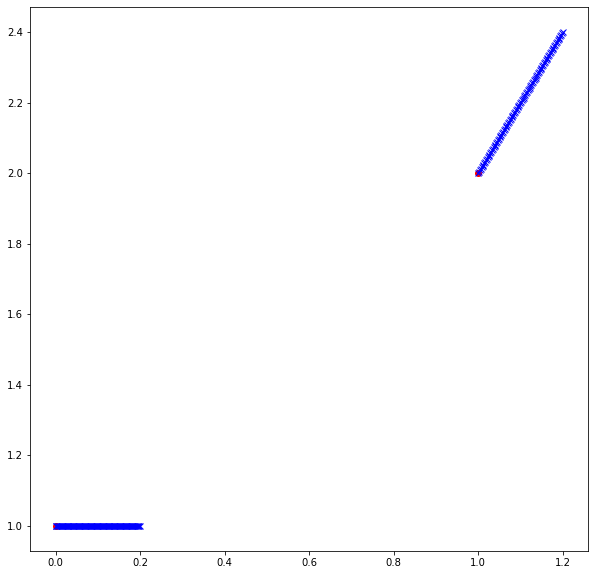

In [230]:
f_gamma = lambda t : gamma(t, P1, P2, u1, u2)
P1, P2 = np.array([1,2]), np.array([4,5])
u1, u2 = np.array([0,5]), np.array([1,10])
tab_val = np.empty(shape = (2, 100))
tab_t = np.linspace(0, 1, 100)
for i in range(100):
    t = tab_t[i]
    tab_val[0][i] = f_gamma(t)[0]
    tab_val[1][i] = gamma(t, P1, P2, u1, u2)[1]

plt.plot(tab_val[0], tab_val[1], 'g')
plt.plot(P1[0], P1[1], 'bo')
plt.plot(P2[0], P2[1], 'ro')
T = np.linspace(0,0.2,100)

for i in T :
    plt.plot(P1[0]+i*u1[0],P1[1]+ i*u1[1],'bo')
    plt.plot(P2[0]+i*u2[0],P2[1]+ i*u2[1],'bo')
#en bleu les tangentes



plt.axis('equal')
plt.show()

**Tâche 7:**

In [ ]:
def level_curve2()

**Tâhce 8:**


On vérifie graphiquement sur les exemples de références :